## Final Project Submission

Please fill out:
* Student name: Alexander Black
* Student pace: full time
* Scheduled project review date/time: 3/8/19 at 1:00PM EST
* Instructor name: Brandon Lewis
* Blog post URL: 


# Obtaining the Data

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
# Putting data into df from csv
df = pd.read_csv('kc_house_data.csv')
print(df.info())
df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


# Scrubbing the Data
## Checking for Null values and Resolving them

Below, I check for all NaN values in the database, and sum them by column



In [3]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Alright, it looks like we have some null values to deal with in the waterfront, view, and yr_renovated columns.

**waterfront:** Here, the NaN probably means that the property is NOT a waterfront property. As such, I will replace all NaN values with 0s. 

**yr_renovated:** Here, I'm going to assume that if yr_renovated is a NaN value, the house has never been renovated. The best way to deal with this is to create an entirely new column called "was_renovated". Upon further investigation of the column, it appears that there are a lot of 0's as well. If the house has a NaN value or a 0 value in yr_renovated, then it will show us as a 0 in the was_renovated column. Otherwise, it will appear as a 1 in the was_renovated column to indicate that the house has indeed been renovated.  

**view:** Similar to waterfront, I will replace all NaN values with 0 as I assume they represent the same thing. 

In [4]:
# Handling waterfront first, replacing NaNs with 0s

df['waterfront'].fillna(0, inplace=True)

# Checking it worked
df['waterfront'].isna().sum()

0

In [5]:
df['yr_renovated']


0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          NaN
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          NaN
24          0.0
25          0.0
26          NaN
27          0.0
28          NaN
29          0.0
          ...  
21567       0.0
21568       0.0
21569       0.0
21570       0.0
21571       0.0
21572       0.0
21573       0.0
21574       0.0
21575       NaN
21576       NaN
21577       NaN
21578       0.0
21579       NaN
21580       0.0
21581       NaN
21582       0.0
21583       NaN
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590       0.0
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Leng

In [6]:
# yr_renovated next, using apply and a function to clarify

# First, we'll convert all NaNs to zeros just as we did above since they mean the same thing.

df['yr_renovated'].fillna(0, inplace=True)

# Checking it worked
df['yr_renovated'].isna().sum()

#Now we create our new column using df.loc

df.loc[df["yr_renovated"] == 0, "was_renovated"] = 0
df.loc[df["yr_renovated"] > 0, "was_renovated"] = 1

df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


In [7]:
# Just double checking that we didn't miss any values in our new was_renovated column

df['was_renovated'].isna().sum()

0

In [8]:
# Finally, we'll handle view the same way we handled waterfront

df['view'].fillna(0, inplace=True)

# Checking it worked
df['view'].isna().sum()

0

In [9]:
# Final check that we've removed values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
was_renovated    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
was_renovated    21597 non-null float64
dtypes: float64(9), int64(11), obje

# Ensuring Correct Datatype

Looking at our .info(), now all of our variables are stored as integers or floats, with the exception of Date and sqft_basement. Clearly sqft_basement should be represented as an integer or float, but it is currently a string. Additionally, the date should be a datetime object for use of built in methods that will be helpful later.

After searching through the head of the df, we can see that several houses have the string "?" as their sqft_basement. Let's count them and see what to do with them.

In [11]:
print(df.loc[df["sqft_basement"] == '?'].count())
print(df.loc[df["sqft_basement"] == '0.0'].count())

id               454
date             454
price            454
bedrooms         454
bathrooms        454
sqft_living      454
sqft_lot         454
floors           454
waterfront       454
view             454
condition        454
grade            454
sqft_above       454
sqft_basement    454
yr_built         454
yr_renovated     454
zipcode          454
lat              454
long             454
sqft_living15    454
sqft_lot15       454
was_renovated    454
dtype: int64
id               12826
date             12826
price            12826
bedrooms         12826
bathrooms        12826
sqft_living      12826
sqft_lot         12826
floors           12826
waterfront       12826
view             12826
condition        12826
grade            12826
sqft_above       12826
sqft_basement    12826
yr_built         12826
yr_renovated     12826
zipcode          12826
lat              12826
long             12826
sqft_living15    12826
sqft_lot15       12826
was_renovated    12826
dtype: int64


We can see that there's only 454 instances of houses with a "?" in the sqft_basement column. There are also 12,826 with 0 entered as the value for the basement. For now, I will assume that the ? basements are equal to 0. Then, I'll change the type of the column from string to float.

In [12]:
df.loc[df["sqft_basement"] == '?', "sqft_basement"] = 0

In [13]:
df['sqft_basement'] = df['sqft_basement'].astype("float64")

In [14]:
# Check to make sure everything is working

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
was_renovated    21597 non-null float64
dtypes: float64(10), int64(11), ob

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


In [15]:
# Now to convert the date into a datetime object

# First we'll preview to make sure it looks right
pd.to_datetime(df['date'], format='%m/%d/%Y').head()

# Then go ahead and do it to entire column
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


Looking at our data, it might be helpful to have a "yr_sold" column so that we can do some calculations on differences between yr_built, yr_renovated, and yr_sold. I create that column below. Then, I calculate the house_age_at_sale by subtracting yr_built from yr_sold.


In [16]:
# Creating yr_sold column
df['yr_sold'] = df['date'].dt.year

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015


In [18]:
# Creating house_age_at_sale column
df['house_age_at_sale'] = df['yr_sold'] - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold,house_age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015,28


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                   21597 non-null int64
date                 21597 non-null datetime64[ns]
price                21597 non-null float64
bedrooms             21597 non-null int64
bathrooms            21597 non-null float64
sqft_living          21597 non-null int64
sqft_lot             21597 non-null int64
floors               21597 non-null float64
waterfront           21597 non-null float64
view                 21597 non-null float64
condition            21597 non-null int64
grade                21597 non-null int64
sqft_above           21597 non-null int64
sqft_basement        21597 non-null float64
yr_built             21597 non-null int64
yr_renovated         21597 non-null float64
zipcode              21597 non-null int64
lat                  21597 non-null float64
long                 21597 non-null float64
sqft_living15        21597 non-null int64
sqft_lot15           215

# Exploring the Data

Here- I start with intuition. Before doing any EDA, I believed that sqft_living, house_age_at_sale, yr_sold, and bathrooms would be the biggest predictors of price. I insert those columns into a "mini_df" and then look at their correlations with price. I chose these variables because I thought they were "continuous"-ish variables and I originally planned on running them as continuous variables. Later after further analysis, I determine that some of them are better off as binned categories.

# <font color='green'> Question 1: </font> Before any variable transformation or scaling, which variables appear to have the highest correlation with price? Which categorical variables appear to be the most relevant to price?

In [20]:
mini_df = df.loc[:,['price', 'sqft_living', 'house_age_at_sale', 'yr_sold', 'bathrooms']]
mini_df.head()

,price,sqft_living,house_age_at_sale,yr_sold,bathrooms
0,221900.0,1180,59,2014,1.00
1,538000.0,2570,63,2014,2.25
2,180000.0,770,82,2015,1.00
3,604000.0,1960,49,2014,3.00
4,510000.0,1680,28,2015,2.00


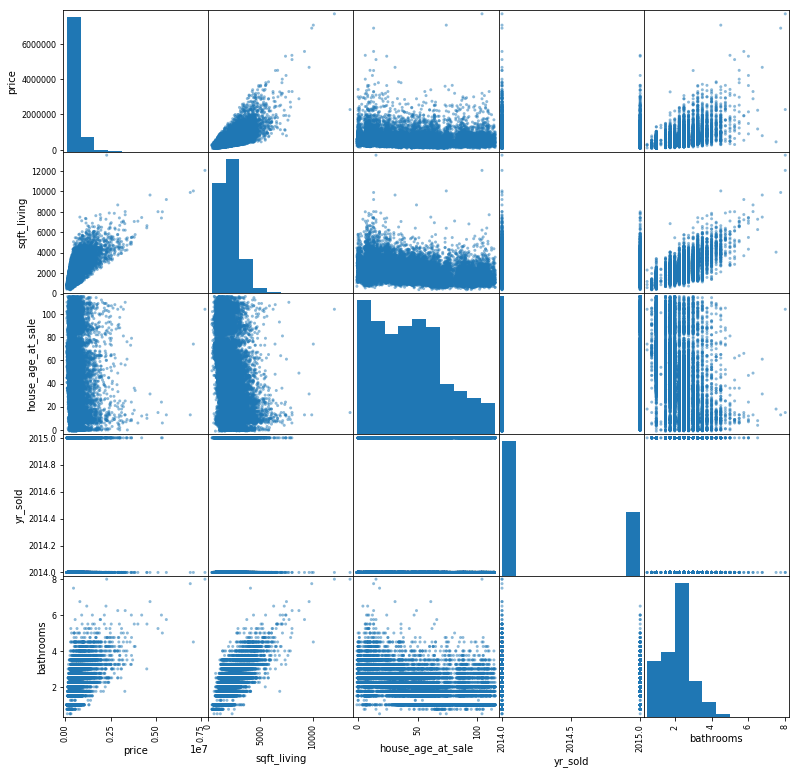

In [21]:
# First, we'll get a look at some predictors! Note these are the predictors that I thought would have the highest 
# correlation with price

pd.plotting.scatter_matrix(mini_df,figsize  = [13, 13]);

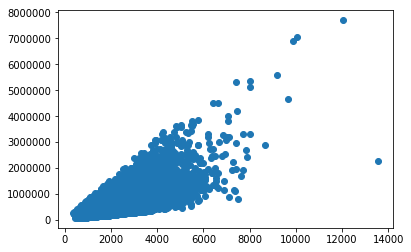

In [22]:
plt.scatter(mini_df['sqft_living'],mini_df['price'])

This is great! Looking like a highly linear relationship between price and sqft_living

In [23]:
mini_df.corr()

,price,sqft_living,house_age_at_sale,yr_sold,bathrooms
price,1.000000,0.701917,-0.053890,0.003727,0.525906
sqft_living,0.701917,1.000000,-0.318592,-0.029014,0.755758
house_age_at_sale,-0.053890,-0.318592,1.000000,0.012344,-0.507561
yr_sold,0.003727,-0.029014,0.012344,1.000000,-0.026577
bathrooms,0.525906,0.755758,-0.507561,-0.026577,1.000000


In [24]:
abs(mini_df.corr())>0.75

,price,sqft_living,house_age_at_sale,yr_sold,bathrooms
price,True,False,False,False,False
sqft_living,False,True,False,False,True
house_age_at_sale,False,False,True,False,False
yr_sold,False,False,False,True,False
bathrooms,False,True,False,False,True


Sqft_living has a high correlation, but none of the other variables really do. 

In [ ]:
import seaborn as sns
sns.heatmap(mini_df.corr(), center=0);

Here, we'll do our first EDA over some of the categorical variables, even though they have not been binned or organized yet. We'll create another "mini_df2" to reduce the noise on this analysis

In [26]:
# Let's look at even more variables
mini_df2 = df.iloc[:,:12]
mini_df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8


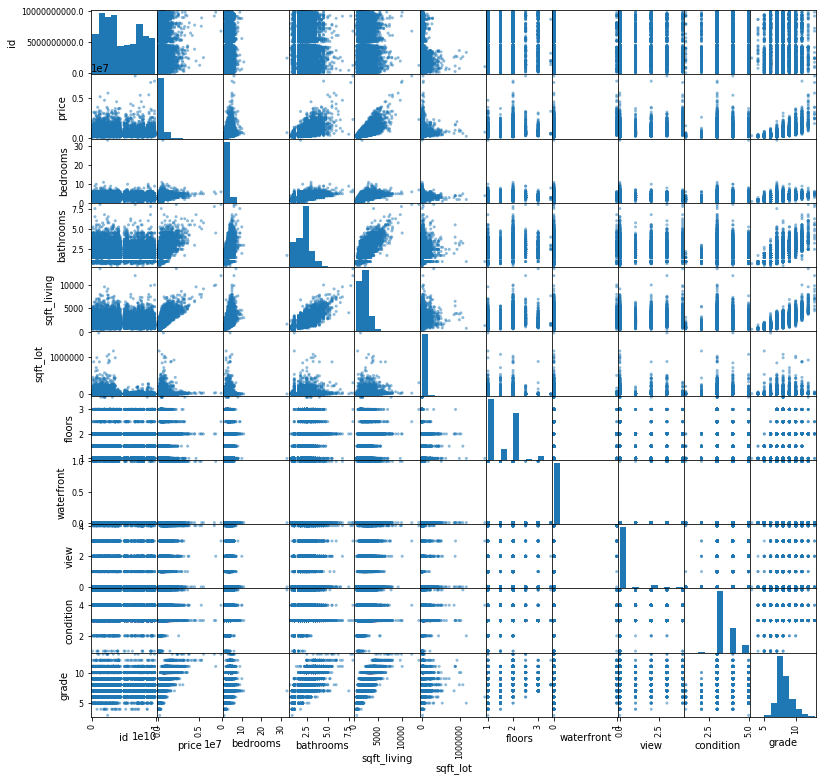

In [27]:
pd.plotting.scatter_matrix(mini_df2,figsize  = [13, 13]);

In [159]:
mini_df2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896


In [28]:
abs(mini_df2.corr())>0.65

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
id,True,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,True
bedrooms,False,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,True
sqft_living,False,True,False,True,True,False,False,False,False,False,True
sqft_lot,False,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False
condition,False,False,False,False,False,False,False,False,False,True,False


It looks like "grade" could also be a good predictor of price, as it is the only variable besides sqft_living with a correlation greater than 0.65. Let's take a look at the scatter plot.

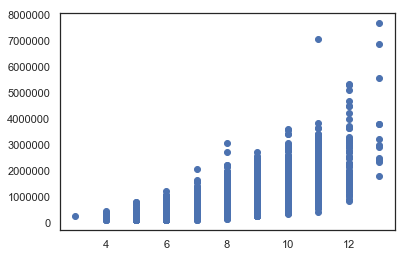

In [150]:
plt.scatter(mini_df2['grade'],mini_df2['price'])

The relationship looks like it could be linear, but clearly this is a categorical variable and need to be analyzed as such. Further below I will bin and one-hot-encode this variable to make it usable for regression.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE3E631D0>,
      dtype=object)

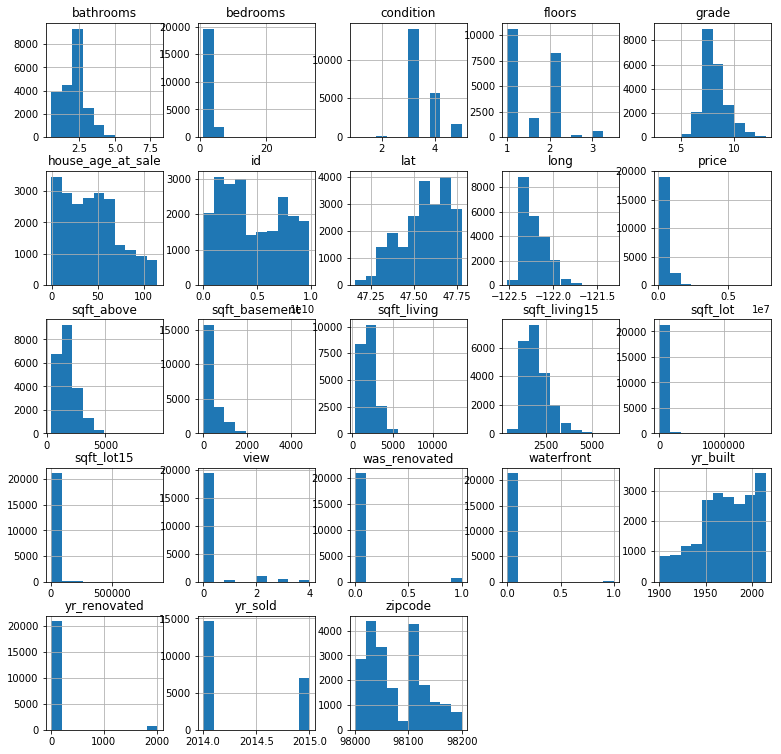

In [29]:
# Then, we'll take another look at the data to see which variables will need log transformations for normalization purposes

df.hist(figsize  = [13, 13])

## Conclusions after cursory EDA over all predictors

1. **CATEGORICAL VARIALBES**: bathrooms, bedrooms, condition, floors, grade, yr_built, yr_renovated, house_age_at_sale
2. **CONTINUOUS VARIABLES**: sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot
3. **BINARY VARIABLES**: was_renovated
4. **UNIMPORTANT VARIALBES**: id, lat, long, zipcode, view

-- Categorical variables will need to be binned and one-hot encoded before modeling

-- Since none of the continuous variables above appear to be normally distributed, we may need to log transform them (thereby forcing them into a more normal distribution) in order to get accurate regression results.

# <font color='green'> Question 1 ANSWER:</font> Using scatter plots and correlation matrices to quickly look through the data,  sqft_living and grade appear to have the greatest influence on price. However- these correlation matrices above do not return meaningful results for categorical variables because they are being treated as continuous variables. 

# <font color='green'> Question 2: </font> When binning our categorical variables, particularly grade (which appears to be highly correlated with price), what are the best bin sizes to use? How do we ensure our bins are ideally spaced for regression analysis? Grade also looks like it could be a continuous variable- given it's meaning does it make more sense at continuous or categorical?

## Dealing with Categorical Variables

Here, I will put the cateogrical values into bins and perform one hot encoding to make them usable for regression. The binning is somewhat subjective and I split each variable into bins that satisfied 2 requirements.
1. Bins must be useful for interpreting regression results
2. Bins must each contain enough data to make regression results meaningful

In [164]:
# This is a copy DF to bin categorical variables
# CATEGORICAL VARIALBES: bathrooms, bedrooms, condition, floors, grade, yr_built, yr_renovated, MAYBE house_age_at_sale
cat_df = df.copy()
cat_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold,house_age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015,28


In [165]:
# Binning 'grade' column
cat_df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

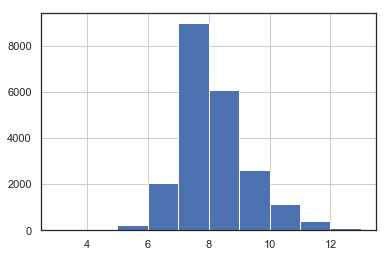

In [177]:
cat_df['grade'].hist()

In [166]:
#I ended up using more bins for grade than any other cateogrical variable, because each grade has unique qualitative
#attributes and grade (from our analysis above) seemed to be highly correlated to price.

#Creating equal-ish bins
bins_g = [0, 5, 6, 7, 8, 9, 10, 13]
bins_grade = pd.cut(cat_df['grade'], bins_g)

#Transform this to ordered categories
bins_grade = bins_grade.cat.as_unordered()


I ended up using more bins for grade than any other cateogrical variable, because each grade has unique qualitative attributes and grade (from our analysis above) seemed to be highly correlated to price.

Text(0, 0.5, '# of Homes')

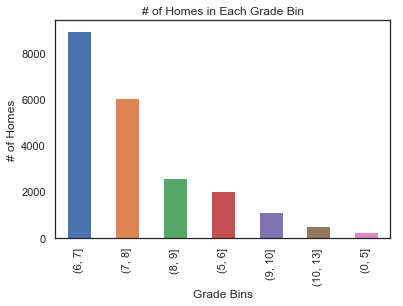

In [167]:
#Let's see if that made even-ish bins
bins_grade.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Grade Bin")
plt.xlabel("Grade Bins")
plt.ylabel("# of Homes")

# <font color='green'> Question 2 ANSWER: </font> I determined through reading Kings County documentation on the meaning of each grade, that there are too many qualitative features for it to operate as a continuous variable. i.e. grade 12 is not equivalent to double grade 6. <br> <br> Furthermore, each grade number besides 3, 4, 12, and 13 seem to have a good number of observations (>1000) which should make regression on this scale viable. 

In [168]:
# Same thing for bathrooms
cat_df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [169]:
# Creating equal-ish bins
bins_b = [0, 1.5, 2.25, 3, 8]
bins_bathrooms = pd.cut(cat_df['bathrooms'], bins_b)

#Transform this to ordered categories
bins_bathrooms = bins_bathrooms.cat.as_unordered()



Text(0, 0.5, '# of Homes')

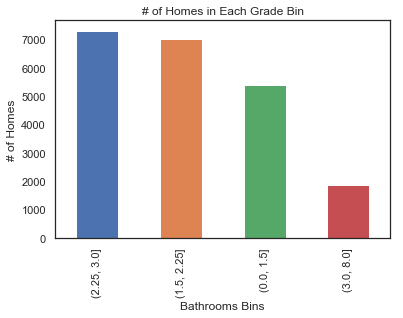

In [170]:
#Let's see if that made even-ish bins
bins_bathrooms.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Bathrooms Bin")
plt.xlabel("Bathrooms Bins")
plt.ylabel("# of Homes")

In [36]:
# Let's do it again for bedrooms
cat_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

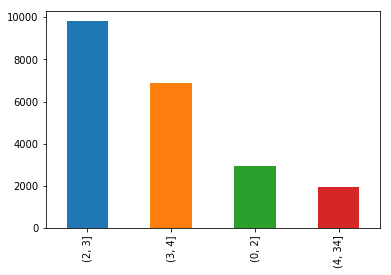

In [37]:


# Creating equal-ish bins
bins_bed = [0, 2, 3, 4, 34] #Used personal discretion and value_counts above to come up with equal-ish ranges
bins_bedrooms = pd.cut(cat_df['bedrooms'], bins_bed)

#Transform this to ordered categories
bins_bedrooms = bins_bedrooms.cat.as_unordered()



Text(0, 0.5, '# of Homes')

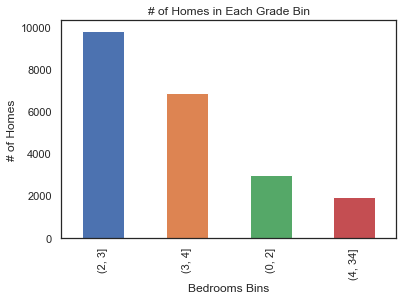

In [171]:
#Let's see if that made even-ish bins
bins_bedrooms.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Bedrooms Bin")
plt.xlabel("Bedrooms Bins")
plt.ylabel("# of Homes")

In [38]:
# Again! This time for condition
cat_df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [172]:
# Creating equal-ish bins
bins_cond = [0, 2, 3, 4, 5] #Used personal discretion and value_counts above to come up with equal-ish ranges
bins_condition = pd.cut(cat_df['condition'], bins_cond)

#Transform this to ordered categories
bins_condition = bins_condition.cat.as_unordered()



Text(0, 0.5, '# of Homes')

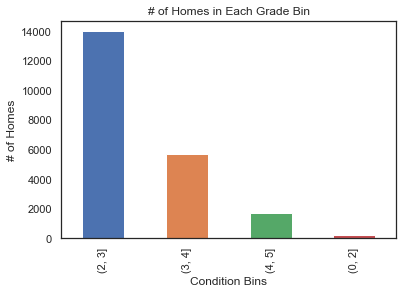

In [174]:
#Let's see if that made even-ish bins
bins_condition.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Condition Bin")
plt.xlabel("Condition Bins")
plt.ylabel("# of Homes")

In [40]:
# Again! BUT FOR FLOORS
cat_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

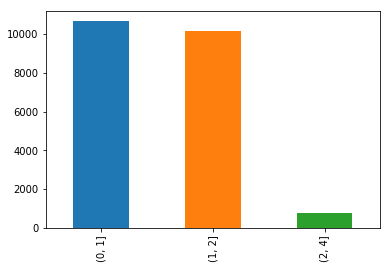

In [41]:
# Creating equal-ish bins
bins_f = [0, 1, 2, 4] #Used personal discretion and value_counts above to come up with equal-ish ranges
bins_floors = pd.cut(cat_df['floors'], bins_f)

#Transform this to ordered categories
bins_floors = bins_floors.cat.as_unordered()



In [ ]:
#Let's see if that made even-ish bins
bins_floors.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Floors Bin")
plt.xlabel("Floors Bins")
plt.ylabel("# of Homes")

<font color = 'blue'>Here- I decided that I won't use yr_built or yr_renovated. Instead, I'll use house_age_at_sale which makes more sense as it combines yr_built and yr_sold</font>

In [43]:
#Final binning for house age at sale
cat_df['house_age_at_sale'].describe()

count    21597.000000
mean        43.323286
std         29.377285
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: house_age_at_sale, dtype: float64

In [175]:
# Creating equal-ish bins
bins_h = [0, 20, 40, 60, 120] #Used personal discretion and value_counts above to come up with equal-ish ranges
bins_house_age = pd.cut(cat_df['house_age_at_sale'], bins_h)

#Transform this to ordered categories
bins_house_age = bins_house_age.cat.as_unordered()



Text(0, 0.5, '# of Homes')

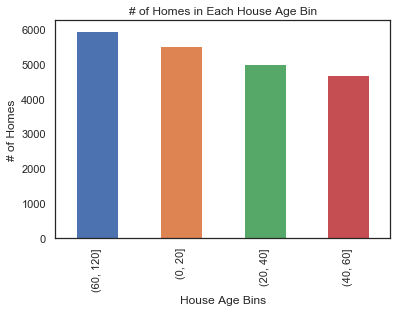

In [176]:
#Let's see if that made even-ish bins
bins_house_age.value_counts().plot(kind='bar')
plt.title("# of Homes in Each House Age Bin")
plt.xlabel("House Age Bins")
plt.ylabel("# of Homes")

In [151]:
# Setting up dummy variables 
# CATEGORICAL VARIALBES: bathrooms, bedrooms, condition, floors, grade, yr_built, yr_renovated, MAYBE house_age_at_sale

grade_dummy = pd.get_dummies(bins_grade, prefix="GRADE")
bathrooms_dummy = pd.get_dummies(bins_bathrooms, prefix="BATHROOMS")
bedrooms_dummy = pd.get_dummies(bins_bedrooms, prefix="BEDROOMS")
condition_dummy = pd.get_dummies(bins_condition, prefix="CONDITION")
floors_dummy = pd.get_dummies(bins_floors, prefix="FLOORS")
house_age_dummy = pd.get_dummies(bins_house_age, prefix="HOUSE_AGE")

#Note- I will pull these dummies directly LATER into the final_df that I use for regression

In [46]:
# Drop the original column and put in our dummy column

cat_df = cat_df.drop(['grade'], axis=1)
cat_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold,house_age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015,28


In [47]:
# Here, I add the columns to our cat_df to make sure the dummies are working properly. Note that I will not use this df for
# regression.

cat_df = pd.concat([cat_df, grade_dummy, bathrooms_dummy, bedrooms_dummy, condition_dummy, floors_dummy, house_age_dummy], axis=1)


In [48]:
cat_df.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'was_renovated', 'yr_sold', 'house_age_at_sale', 'GRADE_(0, 5]',
       'GRADE_(5, 6]', 'GRADE_(6, 7]', 'GRADE_(7, 8]', 'GRADE_(8, 9]',
       'GRADE_(9, 10]', 'GRADE_(10, 13]', 'BATHROOMS_(0.0, 1.5]',
       'BATHROOMS_(1.5, 2.25]', 'BATHROOMS_(2.25, 3.0]',
       'BATHROOMS_(3.0, 8.0]', 'BEDROOMS_(0, 2]', 'BEDROOMS_(2, 3]',
       'BEDROOMS_(3, 4]', 'BEDROOMS_(4, 34]', 'CONDITION_(0, 2]',
       'CONDITION_(2, 3]', 'CONDITION_(3, 4]', 'CONDITION_(4, 5]',
       'FLOORS_(0, 1]', 'FLOORS_(1, 2]', 'FLOORS_(2, 4]',
       'HOUSE_AGE_(0, 20]', 'HOUSE_AGE_(20, 40]', 'HOUSE_AGE_(40, 60]',
       'HOUSE_AGE_(60, 120]'], dtype=object)

# <font color='green'> Question 3: </font> Do our continuous variables meet the normality assumption required for effective linear regression? Will log transforming them ensure this normality?

## Transforming continuous variables

Below, I perform more in-depth EDA over the continuous variables, and then decide to log-transform them in order to reduce skewness and approach normality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE1D215F8>,
      dtype=object)

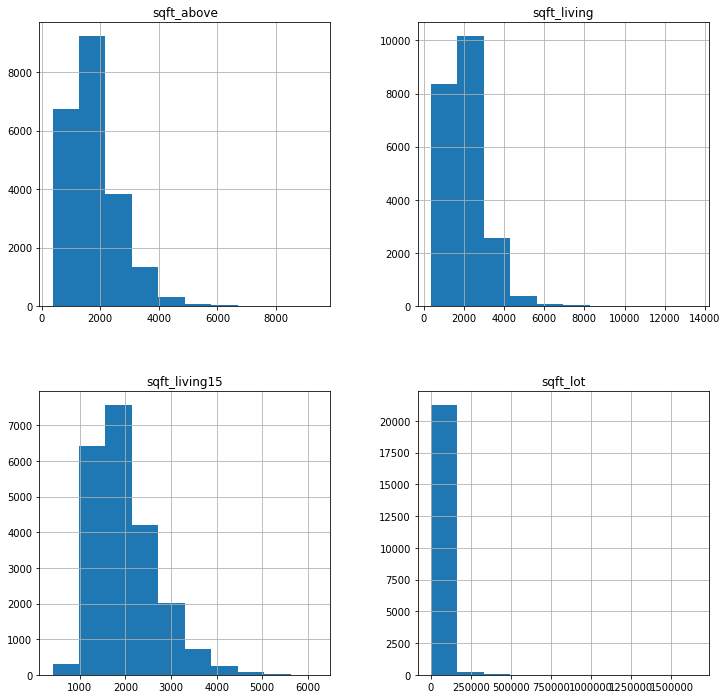

In [49]:
# First, I check out what the distribution looks like before transformation. 
df[['sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot']].hist(figsize = [12,12])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE2F68518>,
      dtype=object)

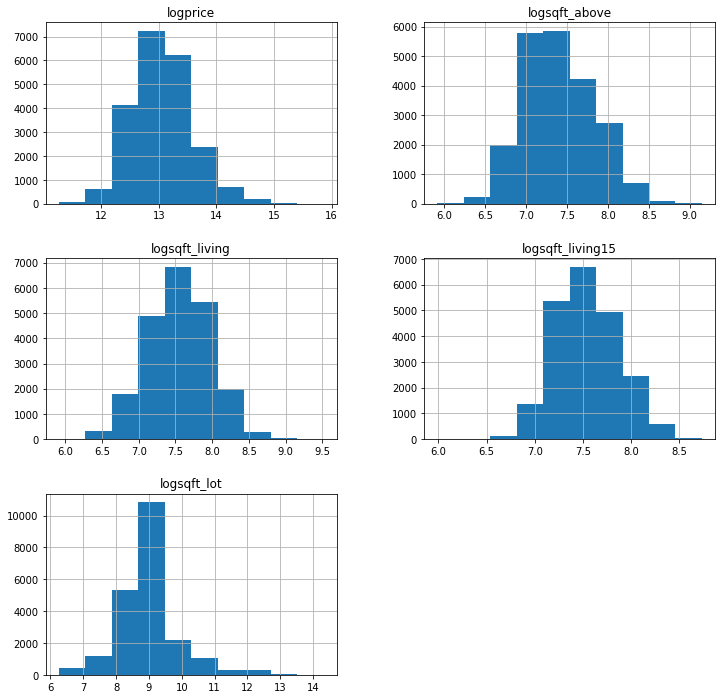

In [50]:
# Putting log transformations into their own dataframe and plotting histograms

data_log = pd.DataFrame([])
data_log['logprice'] = np.log(df['price'])
data_log['logsqft_above'] = np.log(df['sqft_above'])
#data_log['logsqft_basement'] = np.log(df['sqft_basement']) #Includes 0 values, therefore commented out
data_log['logsqft_living'] = np.log(df['sqft_living'])
data_log['logsqft_living15'] = np.log(df['sqft_living15'])
data_log['logsqft_lot'] = np.log(df['sqft_lot'])

data_log.hist(figsize=[12,12])

# <font color='green'> Question 3 ANSWER:</font> After transformation, all four of these continuous variables appear much better suited to a normal distribution than before. Keep in mind that this transformation will change the interpretation of the coefficients during regression.

In [51]:
## SCALE VARIALBES HERE

# First we create the log variables

log_sqft_above = np.log(df['sqft_above'])
log_sqft_living = np.log(df['sqft_living'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_lot = np.log(df['sqft_lot'])

# Then we'll use min-max scaling on all of our variables

# scaled_sqft_above = (log_sqft_above-min(log_sqft_above)) / (max(log_sqft_above) -min(log_sqft_above))
# scaled_sqft_living = (log_sqft_living-min(log_sqft_living)) / (max(log_sqft_living) -min(log_sqft_living))
# scaled_sqft_living15 = (log_sqft_living15-min(log_sqft_living15)) / (max(log_sqft_living15) -min(log_sqft_living15))
# scaled_sqft_lot = (log_sqft_lot-min(log_sqft_lot)) / (max(log_sqft_lot) -min(log_sqft_lot))

# Using standardization scaling
scaled_sqft_above = (log_sqft_above-np.mean(log_sqft_above)) / np.sqrt(np.var(log_sqft_above))
scaled_sqft_living = (log_sqft_living-np.mean(log_sqft_living)) / np.sqrt(np.var(log_sqft_living))
scaled_sqft_living15 = (log_sqft_living15-np.mean(log_sqft_living15)) / np.sqrt(np.var(log_sqft_living15))
scaled_sqft_lot = (log_sqft_lot-np.mean(log_sqft_lot)) / np.sqrt(np.var(log_sqft_lot))

data_final = pd.DataFrame([])
data_final['log_sqft_above'] = scaled_sqft_above
data_final['log_sqft_living'] = scaled_sqft_living
data_final['log_sqft_living15'] = scaled_sqft_living15
data_final['log_sqft_lot'] = scaled_sqft_lot

# Bringing in the categorical variables...

grade_dummies = pd.get_dummies(bins_grade, prefix="GRADE")
bathrooms_dummies = pd.get_dummies(bins_bathrooms, prefix="BATHROOMS")
bedrooms_dummies = pd.get_dummies(bins_bedrooms, prefix="BEDROOMS")
condition_dummies = pd.get_dummies(bins_condition, prefix="CONDITION")
floors_dummies = pd.get_dummies(bins_floors, prefix="FLOORS")
house_age_dummies = pd.get_dummies(bins_house_age, prefix="HOUSE_AGE") # REMOVED THIS FOR REASONS explained below

# Our dependent variable- LOG TRANSFORMED
logprice = np.log(df['price'])

#TESTING scaling dependent variable
#scaledlogprice = (logprice-np.mean(logprice)) / np.sqrt(np.var(logprice))

# Concat it all together
data_final = pd.concat([logprice, data_final, grade_dummies, 
                        bathrooms_dummies, bedrooms_dummies, condition_dummies, floors_dummies, house_age_dummies], axis=1)

# <font color='green'> NOTE: As I began my regression experiments below, I found that I was getting very low correlation between price and my independent continuous variables. As I discovered, part of the reason for this is that the dependent variable price is skewed pretty significantly to the right, which may be affecting correlation scores. Examine the chart below comparing the histogram of 'price' vs. the histogram of log-transformed price </font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CC15381D0>,
      dtype=object)

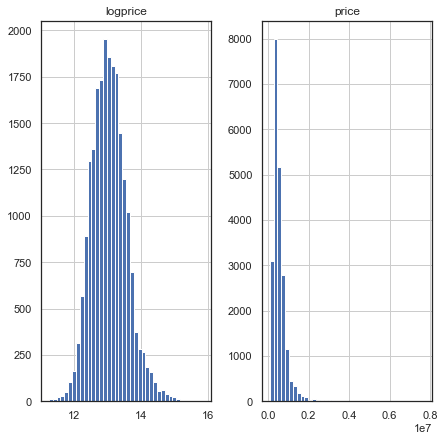

In [155]:
df_comparison = pd.DataFrame([])
df_comparison['price'] = df['price']
df_comparison['logprice'] = np.log(df['price'])
df_comparison.hist(figsize=[7,7], bins=40)

As we can clearly see- logprice is much closer to a normal distribution, and therefore a better dependent variable for our model.

In [52]:
# Let's give it a look!
data_final.head()

,price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]",...,"CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]","HOUSE_AGE_(0, 20]","HOUSE_AGE_(20, 40]","HOUSE_AGE_(40, 60]","HOUSE_AGE_(60, 120]"
0,12.309982,-0.753583,-1.125582,-1.035453,-0.388439,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,13.195614,0.672709,0.709463,-0.326789,-0.113243,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,12.100712,-1.752995,-2.131943,1.126531,0.244481,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,13.311329,-1.026858,0.070676,-0.990210,-0.523926,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,13.142166,0.073516,-0.292732,-0.134221,0.008140,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


 <head><font color=red> NOTE: This excludes was_renovated and view variables, because they both are too insignificantly related to price, and there is not enough variation in values to make their analysis worth it (too many 0s)</font></head>

### First, we'll check out our correlation matrix for our newly transformed continous variables

In [53]:
continuous_df = data_final.iloc[:,:5]
continuous_df.corr()

,price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot
price,1.000000,0.586013,0.674802,0.607154,0.138261
log_sqft_above,0.586013,1.000000,0.864979,0.713102,0.318663
log_sqft_living,0.674802,0.864979,1.000000,0.746836,0.325983
log_sqft_living15,0.607154,0.713102,0.746836,1.000000,0.363743
log_sqft_lot,0.138261,0.318663,0.325983,0.363743,1.000000


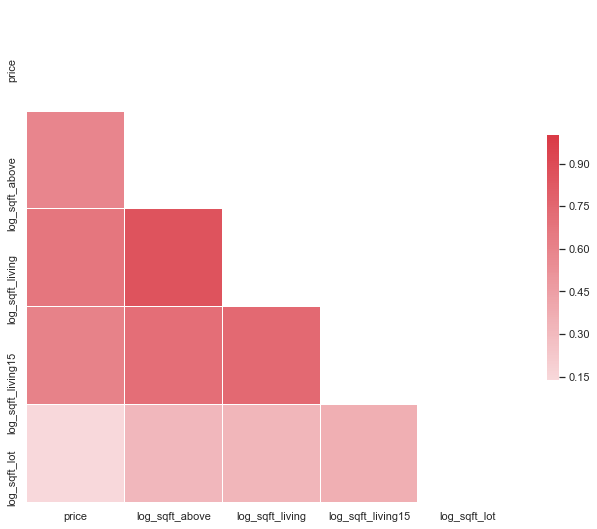

In [54]:
# Let's make a more beatiful correlation matrix
sns.set(style="white")
corr = continuous_df.corr()

# Generate a mask the size of our correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Correlation Matrix Takeaways

Correlations are pretty good between price and all of our continous log variables except for log_sqft_lot. log_sqft above is also highly correlated with log_sqft_living. This is unsurprising, because so few of the houses have basement square footage information. As such, we'll remove log_sqft_above from our analysis

# Let's start modeling- here we'll try our first regressions

In [55]:
# First, we'll do individual regressions for each variable- note price has been log transformmed.

col_names = continuous_df.describe().columns.drop(['price'])
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = sm.ols(formula=f, data=continuous_df).fit()
    X_new = pd.DataFrame({val: [continuous_df[val].min(), continuous_df[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results_log[idx+1])

price~log_sqft_above
------------------------------
['log_sqft_above', 0.3434109763900405, 13.048210941923877, 0.3085607139980395, 0.0]
price~log_sqft_living
------------------------------
['log_sqft_living', 0.45535727584899854, 13.04821094192388, 0.3553118441824262, 0.0]
price~log_sqft_living15
------------------------------
['log_sqft_living15', 0.3686357627771213, 13.04821094192383, 0.3196923745400803, 0.0]
price~log_sqft_lot
------------------------------
['log_sqft_lot', 0.01911602756307318, 13.048210941923958, 0.07280016584265336, 1.2147387791189734e-92]


In [56]:
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,log_sqft_above,0.343411,13.0482,0.308561,0
2,log_sqft_living,0.455357,13.0482,0.355312,0
3,log_sqft_living15,0.368636,13.0482,0.319692,0
4,log_sqft_lot,0.019116,13.0482,0.0728002,1.21474e-92


We can see that log_sqft_living seems to have the highest r squared value

## <font color='blue'> For our initial model, we will drop log_sqft_above and log_sft_living 15 as they both appear to be highly correlated with log_sqft_living, which is our best predictor for price </font>

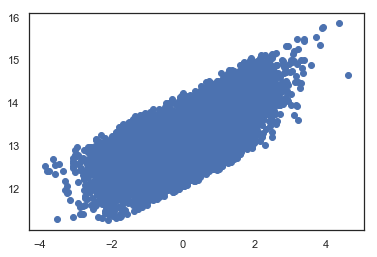

In [57]:
plt.scatter(continuous_df['log_sqft_living'], continuous_df['price'])

# Regression for 3 continous variables we're going to use- first time using statsmodels.

In [58]:
#Regression including just the continous variables....
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
formula = "price ~ log_sqft_living+log_sqft_living15+log_sqft_lot"
model_cont = ols(formula= formula, data=data_final).fit()

In [60]:
model_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     7011.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:00:07   Log-Likelihood:                -9448.0
No. Observations:               21597   AIC:                         1.890e+04
Df Residuals:                   21593   BIC:                         1.894e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.0482      0.003   5116.285      0.000      13.043      13.053
log_sqft_living       0.2718      0.004     70.601      0.000       0.264       0.279
log_sqft_living15     0.1411      0.004     36.118      0.000       0.133       0.149
log_sqft_lot         -0.0671      0.003    -24.426      0.000      -0.073      -0.062
==============================================================================
Omnibus:                       73.854   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.764
Skew:                           0.107   Prob(JB):                     1.17e-15
Kurtosis:                       2.826   Cond. No.                         2.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
data_final.head()

,price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]",...,"CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]","HOUSE_AGE_(0, 20]","HOUSE_AGE_(20, 40]","HOUSE_AGE_(40, 60]","HOUSE_AGE_(60, 120]"
0,12.309982,-0.753583,-1.125582,-1.035453,-0.388439,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,13.195614,0.672709,0.709463,-0.326789,-0.113243,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,12.100712,-1.752995,-2.131943,1.126531,0.244481,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,13.311329,-1.026858,0.070676,-0.990210,-0.523926,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,13.142166,0.073516,-0.292732,-0.134221,0.008140,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


In [157]:
#Regression for all 

X = data_final.drop(['price', 'log_sqft_living15', 'log_sqft_above', 'HOUSE_AGE_(0, 20]',
                    'HOUSE_AGE_(20, 40]','HOUSE_AGE_(40, 60]','HOUSE_AGE_(60, 120]',], axis=1)
y = pd.DataFrame(data_final['price'])
X.head()


,log_sqft_living,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]",...,"BEDROOMS_(2, 3]","BEDROOMS_(3, 4]","BEDROOMS_(4, 34]","CONDITION_(0, 2]","CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]"
0,-1.125582,-0.388439,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0.709463,-0.113243,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-2.131943,0.244481,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0.070676,-0.523926,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,-0.292732,0.008140,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [114]:
X_int = sm.add_constant(X)
model_all = sm.OLS(y, X_int).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1620.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:05:24   Log-Likelihood:                -7220.1
No. Observations:               21597   AIC:                         1.448e+04
Df Residuals:                   21577   BIC:                         1.464e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.9410      0.004   1586.957      0.000       5.934       5.948
log_sqft_living           0.2467      0.005     49.921      0.000       0.237       0.256
log_sqft_lot             -0.0417      0.003    -15.131      0.000      -0.047      -0.036
GRADE_(0, 5]              0.3238      0.020     16.475      0.000       0.285       0.362
GRADE_(5, 6]              0.4460      0.009     48.020      0.000       0.428       0.464
GRADE_(6, 7]              0.6154      0.006    103.043      0.000       0.604       0.627
GRADE_(7, 8]              0.8062      0.006    134.444      0.000       0.794       0.818
GRADE_(8, 9]              1.0378      0.008    135.300      0.000       1.023       1.053
GRADE_(9, 10]             1.2331      0.011    115.618      0.000       1.212       1.254
GRADE_(10, 13]            1.4787      0.016     93.577      0.000       1.448       1.510
BATHROOMS_(0.0, 1.5]      1.5205      0.006    238.201      0.000       1.508       1.533
BATHROOMS_(1.5, 2.25]     1.4834      0.005    322.854      0.000       1.474       1.492
BATHROOMS_(2.25, 3.0]     1.4074      0.005    311.978      0.000       1.399       1.416
BATHROOMS_(3.0, 8.0]      1.5297      0.008    188.321      0.000       1.514       1.546
BEDROOMS_(0, 2]           1.6069      0.007    239.192      0.000       1.594       1.620
BEDROOMS_(2, 3]           1.4499      0.004    368.937      0.000       1.442       1.458
BEDROOMS_(3, 4]           1.4300      0.004    318.954      0.000       1.421       1.439
BEDROOMS_(4, 34]          1.4542      0.007    201.894      0.000       1.440       1.468
CONDITION_(0, 2]          1.3519      0.019     71.196      0.000       1.315       1.389
CONDITION_(2, 3]          1.4198      0.006    222.875      0.000       1.407       1.432
CONDITION_(3, 4]          1.5170      0.007    223.451      0.000       1.504       1.530
CONDITION_(4, 5]          1.6523      0.009    194.221      0.000       1.636       1.669
FLOORS_(0, 1]             1.9474      0.005    372.344      0.000       1.937       1.958
FLOORS_(1, 2]             1.9563      0.005    418.699      0.000       1.947       1.965
FLOORS_(2, 4]             2.0373      0.009    215.228      0.000       2.019       2.056
==============================================================================
Omnibus:                       37.584   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.010
Skew:                           0.095   Prob(JB):                     5.58e-09
Kurtosis:                       3.080   Cond. No.                     3.88e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

 ## <font color = 'red'>NOW DOING THE SAME FOR CATEGORICAL VARIABLES </font>

In [95]:
# Now we'll do the same with each of our categorical variables

In [115]:
cat_df = pd.concat([logprice, data_final.iloc[:,5:]], axis=1)
cat_df.head()

,price,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]","BATHROOMS_(1.5, 2.25]",...,"CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]","HOUSE_AGE_(0, 20]","HOUSE_AGE_(20, 40]","HOUSE_AGE_(40, 60]","HOUSE_AGE_(60, 120]"
0,12.309982,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,13.195614,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,12.100712,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,13.311329,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,13.142166,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [116]:
grade_df = cat_df.iloc[:,1:8]
bathrooms_df = cat_df.iloc[:,8:12]
bedrooms_df = cat_df.iloc[:,12:16]
condition_df = cat_df.iloc[:,16:20]
floors_df = cat_df.iloc[:,20:23]
houseage_df = cat_df.iloc[:,23:27]


## <font color='blue'> Individual Regression for Categorical Variables </font>

In [118]:
# Linear regression performed for all categorical data

dfs = [grade_df, bathrooms_df, bedrooms_df, condition_df, floors_df, houseage_df]
for data in dfs:
    X = data
    y = pd.DataFrame(data_final['price'])
    X_int = sm.add_constant(X)
    model_all = sm.OLS(y, X_int).fit()
    print(model_all.summary())
X_int


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3512.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:05:44   Log-Likelihood:                -9437.0
No. Observations:               21597   AIC:                         1.889e+04
Df Residuals:                   21590   BIC:                         1.894e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5422      0.004   2803.

,const,"HOUSE_AGE_(0, 20]","HOUSE_AGE_(20, 40]","HOUSE_AGE_(40, 60]","HOUSE_AGE_(60, 120]"
0,1.0,0,0,1,0
1,1.0,0,0,0,1
2,1.0,0,0,0,1
3,1.0,0,0,1,0
4,1.0,0,1,0,0
5,1.0,1,0,0,0
6,1.0,1,0,0,0
7,1.0,0,0,1,0
8,1.0,0,0,1,0
9,1.0,1,0,0,0


## <font color='blue'> Grade, bathrooms, and bedrooms seem to be the best indicators of price based on R squared values. We'll drop house_age from our final model because it has an r-squared of less than 0.1</font>

In [158]:
X

,log_sqft_living,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]",...,"BEDROOMS_(2, 3]","BEDROOMS_(3, 4]","BEDROOMS_(4, 34]","CONDITION_(0, 2]","CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]"
0,-1.125582,-0.388439,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0.709463,-0.113243,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-2.131943,0.244481,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0.070676,-0.523926,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,-0.292732,0.008140,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
5,2.468593,2.818266,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
6,-0.244122,-0.179963,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7,-1.378412,0.211971,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
8,-0.156423,-0.078880,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
9,-0.015060,-0.222889,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


## <font color='blue'> Grade, bathrooms, and bedrooms seem to be the best indicators of price based on R squared values. </font>

## TIME FOR RECURSIVE FEATURE ELIMNATION YEEHAW

In [121]:
X = data_final.drop(['price', 'log_sqft_living15', 'log_sqft_above', 'HOUSE_AGE_(0, 20]',
                    'HOUSE_AGE_(20, 40]','HOUSE_AGE_(40, 60]','HOUSE_AGE_(60, 120]',], axis=1)
y = pd.DataFrame(data_final['price'])


In [122]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Selecting the 15 best features
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(X, np.ravel(y))

In [123]:
# Storing whether each variable was selected in a list
selected_or_not = list(selector.support_)
ranking = list(selector.ranking_)
estimators = selector.estimator_
selected_or_not

[True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True]

In [124]:
# Snagging column names
predictor_columns = list(X.columns)

In [125]:
recursive_results_df = pd.DataFrame(list([selected_or_not, ranking]), columns=predictor_columns)
recursive_results_df.rename(index={0:'Selected?', 1:'Ranking'}, inplace=True)
recursive_results_df


,log_sqft_living,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]",...,"BEDROOMS_(2, 3]","BEDROOMS_(3, 4]","BEDROOMS_(4, 34]","CONDITION_(0, 2]","CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]"
Selected?,True,False,True,True,True,True,True,True,True,False,...,False,False,False,True,True,False,True,False,False,True
Ranking,1,2,1,1,1,1,1,1,1,3,...,5,4,6,1,1,7,1,8,9,1


In [126]:
# Creating a list of coefficients spread out correctly so I can insert into recursive_results_df
coefficients = list(estimators.coef_)
print(coefficients)
coefficient_list = []
i=0
for index in range(0, len(predictor_columns)):
    if recursive_results_df.iloc[0,index]:
        coefficient_list.append(coefficients[i])
        i+=1
    else:
        coefficient_list.append(0)
        
print(coefficient_list)

coefficient_df = pd.DataFrame([coefficient_list], columns=predictor_columns)
recursive_results_df = pd.concat([recursive_results_df, coefficient_df], axis=0)
recursive_results_df

[0.2187010840643232, -0.5475035697572996, -0.4025267227510647, -0.2237742902218365, -0.030244216242137748, 0.19789377699295374, 0.38431821280395617, 0.6218368091754298, -0.06797626887292693, 0.07305586261960187, 0.17173314323555466, -0.17980342193778037, -0.08690420002382479, 0.14251866794751616, 0.1350433631467597]
[0.2187010840643232, 0, -0.5475035697572996, -0.4025267227510647, -0.2237742902218365, -0.030244216242137748, 0.19789377699295374, 0.38431821280395617, 0.6218368091754298, 0, 0, -0.06797626887292693, 0.07305586261960187, 0.17173314323555466, 0, 0, 0, -0.17980342193778037, -0.08690420002382479, 0, 0.14251866794751616, 0, 0, 0.1350433631467597]


,log_sqft_living,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]",...,"BEDROOMS_(2, 3]","BEDROOMS_(3, 4]","BEDROOMS_(4, 34]","CONDITION_(0, 2]","CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]"
Selected?,True,False,True,True,True,True,True,True,True,False,...,False,False,False,True,True,False,True,False,False,True
Ranking,1,2,1,1,1,1,1,1,1,3,...,5,4,6,1,1,7,1,8,9,1
0,0.218701,0,-0.547504,-0.402527,-0.223774,-0.0302442,0.197894,0.384318,0.621837,0,...,0,0,0,-0.179803,-0.0869042,0,0.142519,0,0,0.135043


In [127]:
recursive_results_df.rename(index={0:'Coefficient'}, inplace=True)


In [128]:
recursive_results_df = recursive_results_df.transpose()


In [129]:
recursive_results_df

,Selected?,Ranking,Coefficient
log_sqft_living,True,1,0.218701
log_sqft_lot,False,2,0
"GRADE_(0, 5]",True,1,-0.547504
"GRADE_(5, 6]",True,1,-0.402527
"GRADE_(6, 7]",True,1,-0.223774
"GRADE_(7, 8]",True,1,-0.0302442
"GRADE_(8, 9]",True,1,0.197894
"GRADE_(9, 10]",True,1,0.384318
"GRADE_(10, 13]",True,1,0.621837
"BATHROOMS_(0.0, 1.5]",False,3,0


In [130]:
selected_predictors_df = recursive_results_df.loc[recursive_results_df['Selected?'] == True]
selected_predictors_df

,Selected?,Ranking,Coefficient
log_sqft_living,True,1,0.218701
"GRADE_(0, 5]",True,1,-0.547504
"GRADE_(5, 6]",True,1,-0.402527
"GRADE_(6, 7]",True,1,-0.223774
"GRADE_(7, 8]",True,1,-0.0302442
"GRADE_(8, 9]",True,1,0.197894
"GRADE_(9, 10]",True,1,0.384318
"GRADE_(10, 13]",True,1,0.621837
"BATHROOMS_(2.25, 3.0]",True,1,-0.0679763
"BATHROOMS_(3.0, 8.0]",True,1,0.0730559


In [131]:
# And of course we should pull our intercept value...
estimators.intercept_

13.171095595704577

# <font color='green'> QUESTION: What does it mean that some of my bathroom categorical variables were recursively selected by my model, but not others? </font>

# <font color='purple'> CONCLUSION: Our recursive feature elimination tells us that the very best predictors of price are log_sqft_living, grade, bathrooms, bedrooms, and condition </font>

## Here, I'll run a train-test-split that will determine the optimal number of features for the highest R^2 value

In [132]:
# Let's to a train test split for R-squared, increasing the number of selections by two each time.
linreg = LinearRegression()

r_list = []
adj_r_list = []
list_n = list(range(4,20,2))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)


price    0.3884
dtype: float64
price    0.387719
dtype: float64
price    0.493945
dtype: float64
price    0.493382
dtype: float64
price    0.559387
dtype: float64
price    0.558896
dtype: float64
price    0.571886
dtype: float64
price    0.57141
dtype: float64
price    0.573925
dtype: float64
price    0.573451
dtype: float64
price    0.582397
dtype: float64
price    0.581932
dtype: float64
price    0.58705
dtype: float64
price    0.586591
dtype: float64
price    0.587818
dtype: float64
price    0.58736
dtype: float64


It seems that the more features we add, the higher the R^2 value. As such, I decided to keep all of the features I had in before

# 10 Fold cross validation with final model

In [133]:
#Using the 15 best predictors 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


select_15 = RFE(linreg, n_features_to_select = 15)
select_15 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

In [134]:
cv_10_results

array([-0.12061889, -0.12220217, -0.1167614 , -0.11700657, -0.11427618,
       -0.11697117, -0.11628751, -0.12201895, -0.11992663, -0.08216341])

In [135]:
# Put categorical variables and scaled log variables into single dataframe along with 'price'
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

# ONGOING NOTES TO SELF

**Need to transform the dependent variable(price) because I don't think it follows a normal distribution** <br>
**Need to add in binary variables was_renovated and view because I left those out of the dataframe above** <br>
**First thing tomorrow- train-test-split my model** <br>
**Make correlation matrix more beautiful** <br>
**- CHECK OUT THE VERY LAST LAB FOR HAND HELD WALKTHROUGH OF MODELING**


# LIVE QUESTION LIST

1. At what point can I classify a discreet variable as continuous? For example- house_age_at_sale. Lots of different values, but all integers. Do I need to treat this as a categorical variable and bin accordingly?
2. What does it mean if you one a regression and one of your categorical variables is significant, but the others aren't? How can part of a bin of categorical variabes be significant without the entire categorical variable being significant?
3. Do you still have to do one-hot encoding for binary variables?
4. When should we use different methods of scaling? Labs/readmes tend to use a variety of scaling methods with no rhyme or reason. Better to be consistent and scale all data using the same method?

# MAKING A MAP

In [136]:
import folium
from folium import plugins

In [137]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold,house_age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015,28


In [145]:
m = folium.Map([47.5112, -122.257], zoom_start=11)
m

In [146]:
for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        fill_color="#000000",
                        fill=True# divvy color
                       ).add_to(m)
m.save('map.html')

In [86]:
houseArr = df[['lat', 'long']].as_matrix()

# plot heatmap
m.add_child(plugins.HeatMap(houseArr, radius=10))
m.save('map.html')

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [87]:
df['price'].describe()


count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [140]:
Q1_priced_houses = df.loc[df['price'] < 322000]
Q2_priced_houses = df.loc[(df['price'] >= 322000) & (df['price'] < 450000)]
Q3_priced_houses = df.loc[(df['price'] >= 450000) & (df['price'] < 645000)]
Q4_priced_houses = df.loc[df['price'] >= 645000]

In [143]:
m2 = folium.Map([47.5112, -122.257], zoom_start=10.5)
m2

In [144]:
# Creating color coded dots for different quarters of house prices
for index, row in Q1_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#001be5",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)
for index, row in Q2_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#8000d8",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)
for index, row in Q3_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#cb008c",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)    
for index, row in Q4_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#bf0300",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)  
m2.save('color_map.html')